#INVOICE PAYMENT DATE PREDICTION MODEL



# 1.1 Loading the given data set

In [ ]:
import pandas as pd
original_main_data=pd.read_csv("/content/drive/MyDrive/1805109.csv")
original_main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782001,GORDO in,2019-03-12 00:00:00,2019.0,1.928829e+09,2019-02-20,20190220,20190220,20190307.0,USD,RV,1.0,NaN,35308.72,20190220.0,NAA8,1.928829e+09,0
1,U001,0200769623,WAL-MAR corporation,2019-04-23 00:00:00,2019.0,1.929092e+09,2019-04-07,20190405,20190407,20190422.0,USD,RV,1.0,NaN,27641.22,20190407.0,NAH4,1.929092e+09,0
2,U001,0200780849,LAUREL llc,2019-02-13 00:00:00,2019.0,1.928707e+09,2019-01-29,20190129,20190129,20190213.0,USD,RV,1.0,NaN,22092.83,20190129.0,NAA8,1.928707e+09,0
3,U001,0200743123,KROGER foundation,2019-02-08 00:00:00,2019.0,1.928670e+09,2019-01-24,20190123,20190124,20190208.0,USD,RV,1.0,NaN,79422.35,20190124.0,NAA8,1.928670e+09,0
4,U001,0200769623,WAL-MAR foundation,2020-02-11 00:00:00,2020.0,1.930437e+09,2020-01-25,20200124,20200125,20200209.0,USD,RV,1.0,NaN,764.76,20200125.0,NAH4,1.930437e+09,0


#1.2 Getting to know our Data

In [ ]:
# Finding the total number of rows or entries in the data set
len(original_main_data)

50000

In [ ]:
# Getting first look at the data
original_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45594 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
# Checking for NULL values

original_main_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4406
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

INFERENCE :

       1. The column " area_business " is completly empty

       2. The column " clear date " has some null values. These are intentionally null as these are the dates we have to predict.

       3. Most of the date columns are of type Object

# 2.1 Basic Preprocessing

In [ ]:
# Converting the Object type date columns to Date_Time objects


from datetime import datetime

original_main_data['posting_date']=pd.to_datetime(original_main_data['posting_date'])

original_main_data['document_create_date']=pd.to_datetime(original_main_data['document_create_date'],format='%Y%m%d')

original_main_data['document_create_date.1']=pd.to_datetime(original_main_data['document_create_date.1'],format='%Y%m%d')

original_main_data['due_in_date']=pd.to_datetime(original_main_data['due_in_date'],format='%Y%m%d')

original_main_data['baseline_create_date']=pd.to_datetime(original_main_data['baseline_create_date'],format='%Y%m%d')

original_main_data['due_in_date']=pd.to_datetime(original_main_data['due_in_date'])

original_main_data['clear_date']=pd.to_datetime(original_main_data['clear_date'])


In [ ]:
# Verifying our Conversions

original_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45594 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

NOTE :

       1. The column "area_business" is completly NULL.It is not feasible for *NULL imputation* .

       2. Hence I ma dropping it as it will not give any useful information

In [ ]:
# Dropping column 'area_business'
original_main_data.drop('area_business',axis=1,inplace=True)

# 2.2 Checking for anamolies in our data

NOTE :

     1. From the given data dictionary we have,
       
        * document_create_date is the date on which the invoice document was created 

        * clear_date is the date when the invoice was cleared.

        Thus,it doesen't make entries to have clear_date before document_create_date

In [ ]:
#Checking for the above condition

len(original_main_data.loc[original_main_data['document_create_date.1'] > original_main_data['clear_date']]) 




0

Similarly, below I have checked for columns like 

               1. due_in_date

               2. posting_date

               3. baseline_create_date

  These columns should also not contain dates before document_create_date

In [ ]:
len(original_main_data.loc[original_main_data['document_create_date.1'] > original_main_data['due_in_date']])   

134

In [ ]:
len(original_main_data.loc[original_main_data['document_create_date.1'] > original_main_data['posting_date']])

0

In [ ]:
len(original_main_data.loc[original_main_data['document_create_date.1'] > original_main_data['baseline_create_date']])

2154

Below is the percenatge of these rows with anomalies

In [ ]:
# number of abnormal data rows as as percentage

(134+2154)/len(original_main_data)

0.04576

Now as these rows constiture of only about 4% of our data-set, It is better to drop them



In [ ]:
#Dropping the abnormal rows
original_main_data.drop(original_main_data[original_main_data['document_create_date.1'] > original_main_data['due_in_date']].index,inplace=True,axis=0)
original_main_data.drop(original_main_data[original_main_data['document_create_date.1'] > original_main_data['baseline_create_date']].index,inplace=True,axis=0)
len(original_main_data)

47846

# 3.1 DATA SPLITTING

From observation ,my data is time based hence is to be split according to the given dates in ascending order.

1. The data is  splitted  into training and test sets based on a SPLIT_DATE.

2. The entries haveing data before this date belong to train set and after the split date belong to test set 

In [ ]:
#Splitting the data set into train and test sets

# The entries whicch do not have a clearing date are the ons we have to predict.

# Here I put those entries into test_set and the remaining into train set
training_data=original_main_data.loc[original_main_data['clear_date'].isna()==False,:]
test_data=original_main_data.loc[original_main_data['clear_date'].isna()==True,:]


In [ ]:
# Training Data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43658 entries, 0 to 45593
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           43658 non-null  object        
 1   cust_number             43658 non-null  object        
 2   name_customer           43658 non-null  object        
 3   clear_date              43658 non-null  datetime64[ns]
 4   buisness_year           43658 non-null  float64       
 5   doc_id                  43658 non-null  float64       
 6   posting_date            43658 non-null  datetime64[ns]
 7   document_create_date    43658 non-null  datetime64[ns]
 8   document_create_date.1  43658 non-null  datetime64[ns]
 9   due_in_date             43658 non-null  datetime64[ns]
 10  invoice_currency        43658 non-null  object        
 11  document type           43658 non-null  object        
 12  posting_id              43658 non-null  float6

In [ ]:
# Test Data
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45594,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930582e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,RV,1.0,13353.11,2020-03-01,NAH4,1.930582e+09,1
45595,U001,0200782772,ASSOC G trust,NaT,2020.0,1.930870e+09,2020-05-06,2020-05-06,2020-05-06,2020-05-21,USD,RV,1.0,26157.86,2020-05-06,NAA8,1.930870e+09,1
45596,U001,0200794332,COST corporation,NaT,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,83937.31,2020-03-12,NAAX,1.930642e+09,1
45597,U001,0200714710,SYSCO co,NaT,2020.0,1.930628e+09,2020-03-12,2020-03-10,2020-03-12,2020-04-13,USD,RV,1.0,510.31,2020-03-12,NA32,1.930628e+09,1
45598,U001,0200744019,TARG llc,NaT,2020.0,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,16807.58,2020-04-07,NAA8,1.930753e+09,1


In [ ]:
training_data.shape

(43658, 18)

In [ ]:
test_data.shape

(4188, 18)

Now testing for null values in training data

In [ ]:
training_data.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
isOpen                    0
dtype: int64

NOTE :
       1. There are still rows where the column "invoice_id" contains some NULL values

# 4.1 Exploratory Data Analysis (E.D.A)

In [ ]:
# Note the currency is of different types for different invoices
test_data['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

NOTE TO SELF :

By now Data has been split by date into training and testing sets (first 70-30%)split

In [ ]:
original_main_data[['clear_date','posting_date','document_create_date','due_in_date','baseline_create_date']].head()


,clear_date,posting_date,document_create_date,due_in_date,baseline_create_date
0,2019-03-12,2019-02-20,2019-02-20,2019-03-07,2019-02-20
1,2019-04-23,2019-04-07,2019-04-05,2019-04-22,2019-04-07
2,2019-02-13,2019-01-29,2019-01-29,2019-02-13,2019-01-29
3,2019-02-08,2019-01-24,2019-01-23,2019-02-08,2019-01-24
4,2020-02-11,2020-01-25,2020-01-24,2020-02-09,2020-01-25


 NOTE:-

     <#> Target value is the Column named 'due_in_date'

     <#> Bucket value can be calculated by the following :
              
              'aging_bucket'='clear_date' - 'due_in_date'
              

In [ ]:
training_data.groupby('invoice_currency').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
invoice_currency,,,,,,,,,,,,,,,,,
CAD,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3533,3539
USD,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119


Below we have our first look at the test_data.

*   The test data has 4188 entries all of which have "clear_date" as null

*   These are the entries we have to predict



In [ ]:
len(test_data)

4188

In [ ]:
test_data.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                4188
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [ ]:
training_data.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
isOpen                    0
dtype: int64

The column "Invoice_id" is an id column .


*   Since it is not feasible to impute these values for the time being i am dropping it






In [ ]:
# Note invoice_id is missing 6 values, for time being I am dropping it.
training_data[pd.isnull(training_data['invoice_id'])==True]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2633,CA02,0140104429,COSTCO,2019-05-02,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-27,2019-03-09,CAD,X2,1.0,52992.00,2019-02-27,CA10,NaN,0
10246,CA02,0140106054,TREE systems,2019-05-06,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-08,2019-02-18,CAD,X2,1.0,29170.80,2019-02-08,CA10,NaN,0
15668,CA02,0140104225,SAVE-ON-,2019-05-08,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-21,2019-03-03,CAD,X2,1.0,4065.13,2019-02-21,CA10,NaN,0
26037,CA02,0140106054,TREE llc,2019-05-09,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-25,2019-03-07,CAD,X2,1.0,5896.80,2019-02-25,CA10,NaN,0
29132,CA02,0140104429,COSTCO foundation,2019-05-22,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-22,2019-04-01,CAD,X2,1.0,5353.20,2019-03-22,CA10,NaN,0
38671,CA02,0140106054,TREE trust,2019-05-09,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-24,2019-03-06,CAD,X2,1.0,18277.92,2019-02-24,CA10,NaN,0


In [ ]:
# these are the 6 empty rows in the training data-set
# Our test data contains no empty rows (confirmed)

train_data_new=training_data[pd.isnull(training_data['invoice_id'])!=True]
train_data_new

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,USD,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,USD,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,USD,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,USD,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,USD,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,U001,0200148860,DOLLA,2019-06-13,2019.0,1.929403e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,1.0,75112.04,2019-05-29,NAA8,1.929403e+09,0
45590,CA02,0140105686,SYSC,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1.0,1472.60,2019-08-29,CA10,2.960575e+09,0
45591,U001,200769623,WAL-MAR trust,2019-03-18,2019.0,1.928913e+09,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,2221.50,2019-03-06,NAH4,1.928913e+09,0
45592,U001,0200726979,BJ'S co,2020-03-03,2020.0,1.930538e+09,2020-02-17,2020-02-18,2020-02-17,2020-03-03,USD,RV,1.0,331.91,2020-02-17,NAA8,1.930538e+09,0


In [ ]:
train_data_new.isna().sum()

# Thus all null values are now finally removed

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

As seen earlier, the currency column has two values.

In other words they are not in the same unit.

In [ ]:
# Now solving the currency issue (Converting all CAD to USD throught)


train_data_new.groupby('invoice_currency').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
invoice_currency,,,,,,,,,,,,,,,,,
CAD,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533,3533
USD,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119


In [ ]:
train_data_new.loc[train_data_new['invoice_currency']=='CAD'].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
24,CA02,0140104475,FOC corp,2019-12-02,2019.0,2.960592e+09,2019-11-07,2019-11-07,2019-11-07,2019-11-25,CAD,RV,1.0,57555.08,2019-11-15,CA10,2.960592e+09,0
33,CA02,0140104440,SO us,2019-06-19,2019.0,2.960553e+09,2019-06-03,2019-06-03,2019-06-03,2019-06-14,CAD,RV,1.0,304843.83,2019-06-04,CA10,2.960553e+09,0
43,CA02,0140104409,LOB llc,2019-02-15,2019.0,2.960527e+09,2019-01-31,2019-01-31,2019-01-31,2019-02-10,CAD,RV,1.0,159838.65,2019-01-31,CA10,2.960527e+09,0
68,CA02,0140104409,LOB associates,2019-12-20,2019.0,2.960600e+09,2019-12-11,2019-12-11,2019-12-11,2019-12-25,CAD,RV,1.0,90787.03,2019-12-15,CA10,2.960600e+09,0
95,CA02,0140104440,SO corporation,2019-02-26,2019.0,2.960525e+09,2019-02-02,2019-02-03,2019-02-02,2019-02-22,CAD,RV,1.0,244627.81,2019-02-12,CA10,2.960525e+09,0


In [ ]:
# Conversion from CAD to USD 

# i CAD =0.79 CAD
import numpy as np
train_data_1=train_data_new
train_data_1['total_open_amount']=np.where(train_data_1.invoice_currency=='CAD',
                                             train_data_1.total_open_amount*0.79,
                                           train_data_1.total_open_amount)
train_data_1.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45588,U001,0200148860,DOLLA,2019-06-13,2019.0,1.929403e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,1.0,75112.040,2019-05-29,NAA8,1.929403e+09,0
45590,CA02,0140105686,SYSC,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1.0,1163.354,2019-08-29,CA10,2.960575e+09,0
45591,U001,200769623,WAL-MAR trust,2019-03-18,2019.0,1.928913e+09,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,2221.500,2019-03-06,NAH4,1.928913e+09,0
45592,U001,0200726979,BJ'S co,2020-03-03,2020.0,1.930538e+09,2020-02-17,2020-02-18,2020-02-17,2020-03-03,USD,RV,1.0,331.910,2020-02-17,NAA8,1.930538e+09,0
45593,U001,200739006,AL trust,2019-04-19,2019.0,1.929092e+09,2019-04-06,2019-04-05,2019-04-06,2019-04-21,USD,RV,1.0,16174.950,2019-04-06,NAA8,1.929092e+09,0


In [ ]:
print("Data brfore conversion")
original_main_data.loc[45590,['invoice_currency','total_open_amount']]


Data brfore conversion


invoice_currency        CAD
total_open_amount    1472.6
Name: 45590, dtype: object

In [ ]:
train_data=train_data_new
train_data.loc[45590,['invoice_currency','total_open_amount']]

invoice_currency         CAD
total_open_amount    1163.35
Name: 45590, dtype: object

As evident from above, all CAD have been converted tro USD and stored in train_data

In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43652 entries, 0 to 45593
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           43652 non-null  object        
 1   cust_number             43652 non-null  object        
 2   name_customer           43652 non-null  object        
 3   clear_date              43652 non-null  datetime64[ns]
 4   buisness_year           43652 non-null  float64       
 5   doc_id                  43652 non-null  float64       
 6   posting_date            43652 non-null  datetime64[ns]
 7   document_create_date    43652 non-null  datetime64[ns]
 8   document_create_date.1  43652 non-null  datetime64[ns]
 9   due_in_date             43652 non-null  datetime64[ns]
 10  invoice_currency        43652 non-null  object        
 11  document type           43652 non-null  object        
 12  posting_id              43652 non-null  float6

In [ ]:
# Now we sort the training data based on invoice posting date

train_data.sort_values('document_create_date.1')
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,USD,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,USD,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,USD,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,USD,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,USD,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0


# 4.2 CONSTANT COLUMNS

Taking a look at the "document_type" column

In [ ]:
train_data['document type'].unique()


array(['RV'], dtype=object)

In [ ]:
train_data.groupby("document type").count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
document type,,,,,,,,,,,,,,,,,
RV,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652


 This 'document type' column has all same values.

In [ ]:
train_data.groupby("isOpen").count()
# isOpen values are all same

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
isOpen,,,,,,,,,,,,,,,,,
0,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652,43652


The column "is_open" also conatains same values

# 4.3 DUPLICATE COLUMNS

In [ ]:
# Checking for duplicate columns
train_data.loc[train_data.invoice_id!=train_data.doc_id]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


Hence we can infer that "invoice_id" and "doc_id" are duplicate columns

'invoce_id' and 'doc_id' are giving the same infomation 

So new info is derived from either of them 

So I can drop one of them.

In [ ]:
train_data.groupby("cust_payment_terms").count()  #esssential features

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
cust_payment_terms,,,,,,,,,,,,,,,,,
90M7,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
B052,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
B112,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BR12,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
BR56,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAWM,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
NAWN,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
NAWP,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68


'isOpen' column is all 0 because this is test data and all invoives 
are unique.

This column also provides no new additional info.


In [ ]:
train_data['posting_id'].unique()

array([1.])

The column posting_id is also an constant column

In [ ]:
train_data.loc[train_data['document_create_date.1']!=train_data['baseline_create_date'],:]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
24,CA02,0140104475,FOC corp,2019-12-02,2019.0,2.960592e+09,2019-11-07,2019-11-07,2019-11-07,2019-11-25,CAD,RV,1.0,45468.5132,2019-11-15,CA10,2.960592e+09,0
33,CA02,0140104440,SO us,2019-06-19,2019.0,2.960553e+09,2019-06-03,2019-06-03,2019-06-03,2019-06-14,CAD,RV,1.0,240826.6257,2019-06-04,CA10,2.960553e+09,0
68,CA02,0140104409,LOB associates,2019-12-20,2019.0,2.960600e+09,2019-12-11,2019-12-11,2019-12-11,2019-12-25,CAD,RV,1.0,71721.7537,2019-12-15,CA10,2.960600e+09,0
95,CA02,0140104440,SO corporation,2019-02-26,2019.0,2.960525e+09,2019-02-02,2019-02-03,2019-02-02,2019-02-22,CAD,RV,1.0,193255.9699,2019-02-12,CA10,2.960525e+09,0
117,CA02,0140105847,GORDON F systems,2019-05-13,2019.0,2.960544e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-07,CAD,RV,1.0,2071.3800,2019-04-27,CA10,2.960544e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45505,CA02,0140104508,BULK co,2019-05-31,2019.0,2.960549e+09,2019-05-16,2019-05-16,2019-05-16,2019-05-27,CAD,RV,1.0,6630.5174,2019-05-17,CA10,2.960549e+09,0
45507,CA02,0140104423,METRO llc,2019-03-26,2019.0,2.960535e+09,2019-03-14,2019-03-14,2019-03-14,2019-03-25,CAD,RV,1.0,96127.2632,2019-03-15,CA10,2.960535e+09,0
45516,CA02,0140104440,SO llc,2019-07-05,2019.0,2.960556e+09,2019-06-20,2019-06-20,2019-06-20,2019-07-02,CAD,RV,1.0,9751.1517,2019-06-22,CA10,2.960556e+09,0
45549,CA02,0140104429,COSTCO corp,2019-08-26,2019.0,2.960573e+09,2019-08-15,2019-08-15,2019-08-15,2019-08-26,CAD,RV,1.0,11451.1053,2019-08-16,CA10,2.960573e+09,0


These two columns are different namely document_create_date.1 and baseline_create_date

 <#> Target value is the Column named 'due_in_date'
 
 <#> Bucket value can be calculated by the following :
 
          'aging_bucket'='clear_date' - 'due_in_date

In [ ]:
train_data['clear_date']=pd.to_datetime(train_data['clear_date'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43652 entries, 0 to 45593
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           43652 non-null  object        
 1   cust_number             43652 non-null  object        
 2   name_customer           43652 non-null  object        
 3   clear_date              43652 non-null  datetime64[ns]
 4   buisness_year           43652 non-null  float64       
 5   doc_id                  43652 non-null  float64       
 6   posting_date            43652 non-null  datetime64[ns]
 7   document_create_date    43652 non-null  datetime64[ns]
 8   document_create_date.1  43652 non-null  datetime64[ns]
 9   due_in_date             43652 non-null  datetime64[ns]
 10  invoice_currency        43652 non-null  object        
 11  document type           43652 non-null  object        
 12  posting_id              43652 non-null  float6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data['due_in_date']=pd.to_datetime(train_data['due_in_date'])
#train_data['due_in_date']=train_data['due_in_date'].dt.date
train_data['delay']=(train_data['clear_date']-train_data['due_in_date'])

train_data['delay']=(train_data['delay']/ np.timedelta64(1, 'D')).astype(int)

train_data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45588,U001,0200148860,DOLLA,2019-06-13,2019.0,1.929403e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,1.0,75112.040,2019-05-29,NAA8,1.929403e+09,0,0
45590,CA02,0140105686,SYSC,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1.0,1163.354,2019-08-29,CA10,2.960575e+09,0,4
45591,U001,200769623,WAL-MAR trust,2019-03-18,2019.0,1.928913e+09,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,2221.500,2019-03-06,NAH4,1.928913e+09,0,-3
45592,U001,0200726979,BJ'S co,2020-03-03,2020.0,1.930538e+09,2020-02-17,2020-02-18,2020-02-17,2020-03-03,USD,RV,1.0,331.910,2020-02-17,NAA8,1.930538e+09,0,0
45593,U001,200739006,AL trust,2019-04-19,2019.0,1.929092e+09,2019-04-06,2019-04-05,2019-04-06,2019-04-21,USD,RV,1.0,16174.950,2019-04-06,NAA8,1.929092e+09,0,-2


# Splitting into Train , Validation_1 and Validation_2

Now I am spliting the train data into train : Val 1 :Val 2 = 7:15:15


In [ ]:
len(train_data)

43652

In [ ]:
final_train_data,val=np.split(train_data,[int(.7*len(train_data))])
print("Length of final_train_data is ",len(final_train_data),
      "\n Length of val is ",len(val))

Length of final_train_data is  30556 
 Length of val is  13096


In [ ]:
val1,val2=np.split(val,[int(.5*len(val))])
print("Length of val1 is ",len(val1),
      "\nLength of val2 is ",len(val2))

Length of val1 is  6548 
Length of val2 is  6548


In [ ]:
# Check for missing rows

30556+6548*2


43652

Hence the data is effectively split witout missing any value

In [ ]:
# Creating Dictionary which will later be used for mapping
# This is to be done before splitting into x and y
BC_DICT=final_train_data.groupby('business_code')['delay'].mean().to_dict()
BC_DICT

{'CA02': 6.0990774167669475,
 'U001': 0.5291338010250445,
 'U002': 6.672727272727273,
 'U005': 5.454545454545454,
 'U007': 9.5,
 'U013': 9.079625292740047}

Thus , now the split into train_final,validation-1 and valdation_2 has been done

Now Splitting the data into X_train and y_train

In [ ]:
X_train = final_train_data.copy()
X_train.drop('delay', axis=1, inplace=True)
y_train = final_train_data['delay']
final_train_data.shape

(30556, 19)

In [ ]:
X_train.shape

(30556, 18)

In [ ]:
y_train.shape

(30556,)

Thus,the data is split into X_train and y_train

In [ ]:
y_train.head()

0    5
1    1
2    0
3    0
4    2
Name: delay, dtype: int64

# 5.1 Data Visualization and Pattern Analysis

Testing for patterns in data

Analysis of due_in_date with delay

In [ ]:

days=X_train['due_in_date'].dt.day

# Define Day maping function
def day_to_bin(day):
  if day<=7:
    return 1
  elif day>7 and day<=14:
    return 2
  elif day>14 and day<=21:
    return 3
  else:
    return 4

day_bins=np.array(days.map(day_to_bin))
np.unique(day_bins)

array([1, 2, 3, 4])

Effect of Months on delay:

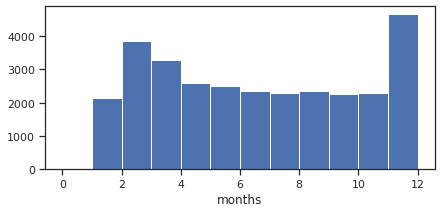

In [ ]:
#Trying monthsas feature
due_months=X_train['due_in_date'].dt.month
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(7,3))
plt.xlabel('months')
ax.hist(due_months,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

From here It can be infered that the month in which the client makes payment may be a useful feature as no two months have the same no of due clearence.

Effect of Amount on delay

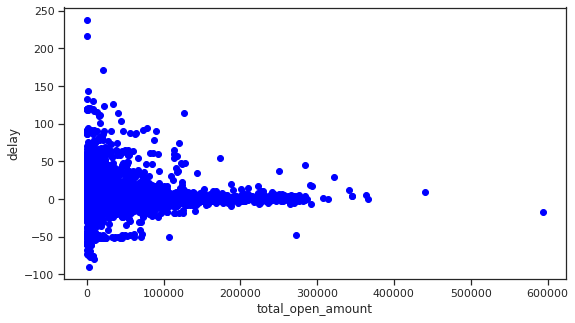

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.xlabel('total_open_amount')
plt.ylabel('delay')
x=(final_train_data['total_open_amount'])
y=final_train_data['delay']
plt.scatter(x,y,c="blue")
plt.show()

INFERENCE:

Clients with less open_amount tebd to delay more than the ines with hogher total_open_amount

In [ ]:
train_data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45588,U001,0200148860,DOLLA,2019-06-13,2019.0,1.929403e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,1.0,75112.040,2019-05-29,NAA8,1.929403e+09,0,0
45590,CA02,0140105686,SYSC,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1.0,1163.354,2019-08-29,CA10,2.960575e+09,0,4
45591,U001,200769623,WAL-MAR trust,2019-03-18,2019.0,1.928913e+09,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,2221.500,2019-03-06,NAH4,1.928913e+09,0,-3
45592,U001,0200726979,BJ'S co,2020-03-03,2020.0,1.930538e+09,2020-02-17,2020-02-18,2020-02-17,2020-03-03,USD,RV,1.0,331.910,2020-02-17,NAA8,1.930538e+09,0,0
45593,U001,200739006,AL trust,2019-04-19,2019.0,1.929092e+09,2019-04-06,2019-04-05,2019-04-06,2019-04-21,USD,RV,1.0,16174.950,2019-04-06,NAA8,1.929092e+09,0,-2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43652 entries, 0 to 45593
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           43652 non-null  object        
 1   cust_number             43652 non-null  object        
 2   name_customer           43652 non-null  object        
 3   clear_date              43652 non-null  datetime64[ns]
 4   buisness_year           43652 non-null  float64       
 5   doc_id                  43652 non-null  float64       
 6   posting_date            43652 non-null  datetime64[ns]
 7   document_create_date    43652 non-null  datetime64[ns]
 8   document_create_date.1  43652 non-null  datetime64[ns]
 9   due_in_date             43652 non-null  datetime64[ns]
 10  invoice_currency        43652 non-null  object        
 11  document type           43652 non-null  object        
 12  posting_id              43652 non-null  float6

Examining the distribution of total_open_amount

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


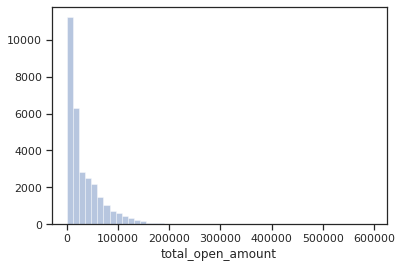

In [ ]:
import seaborn as sns
sns.distplot(a=X_train['total_open_amount'], kde=False)

The distribution is right skewed as seen from graph

I will later use log transform to make it as close to a normal distribution as follows

Range of Delay

In [ ]:
# RAnge of Delay
range=np.ptp(train_data['delay'])
range

350

In [ ]:
train_data['delay'].std()

10.698680669988184

In [ ]:
train_data['delay'].mean()/365


0.0029677436361559483

Effect of business year on Delay

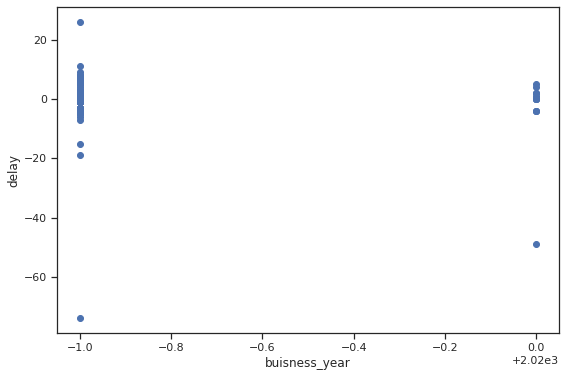

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=train_data.loc[:100,'buisness_year']
y=train_data.loc[:100,'delay']
fig, ax = plt.subplots(figsize=(9,6))
plt.xlabel('buisness_year')
plt.ylabel('delay')
plt.scatter(x,y)

In [ ]:
train_data.groupby('buisness_year').sum()

,doc_id,posting_id,total_open_amount,invoice_id,isOpen,delay
buisness_year,,,,,,
2019.0,7.662833e+13,38021.0,1.232645e+09,7.662833e+13,0,42747
2020.0,1.129146e+13,5631.0,1.773727e+08,1.129146e+13,0,4538


In [ ]:
# Scaling total_open_amount by a factor of 1000
train_data['total_amount_by_1000']=train_data['total_open_amount']/1000
train_data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,total_amount_by_1000
45588,U001,0200148860,DOLLA,2019-06-13,2019.0,1.929403e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,1.0,75112.040,2019-05-29,NAA8,1.929403e+09,0,0,75.112040
45590,CA02,0140105686,SYSC,2019-09-12,2019.0,2.960575e+09,2019-08-23,2019-08-23,2019-08-23,2019-09-08,CAD,RV,1.0,1163.354,2019-08-29,CA10,2.960575e+09,0,4,1.163354
45591,U001,200769623,WAL-MAR trust,2019-03-18,2019.0,1.928913e+09,2019-03-06,2019-03-06,2019-03-06,2019-03-21,USD,RV,1.0,2221.500,2019-03-06,NAH4,1.928913e+09,0,-3,2.221500
45592,U001,0200726979,BJ'S co,2020-03-03,2020.0,1.930538e+09,2020-02-17,2020-02-18,2020-02-17,2020-03-03,USD,RV,1.0,331.910,2020-02-17,NAA8,1.930538e+09,0,0,0.331910
45593,U001,200739006,AL trust,2019-04-19,2019.0,1.929092e+09,2019-04-06,2019-04-05,2019-04-06,2019-04-21,USD,RV,1.0,16174.950,2019-04-06,NAA8,1.929092e+09,0,-2,16.174950


A Plot between cust_number and total_amount

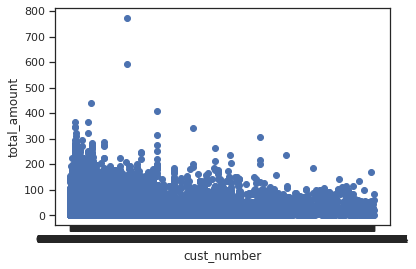

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_data.loc[:,'cust_number'],train_data.loc[:,'total_amount_by_1000'])
plt.xlabel('cust_number')
plt.ylabel('total_amount')
plt.show()

Effect of Customer Payment Terms on Delay

In [ ]:
# Types of terms in data
terms=train_data.cust_payment_terms.unique()
terms

array(['NAA8', 'NAH4', 'NA32', 'NAAX', 'NAU5', 'NAVR', 'NAG2', 'CA10',
       'NA10', 'NAGD', 'NAAW', 'NAC6', 'NA3F', 'NAD1', 'NAD5', 'NAX2',
       'NAWN', 'NAVF', 'NAVD', 'NAVE', 'NATK', 'NAUZ', 'NAWP', 'BR56',
       'NA3B', 'NA38', 'NA84', 'NAVL', 'NAWU', 'NACB', 'NAVQ', 'NAB1',
       'NATL', 'NAD4', 'NAVM', 'NABG', 'NA9X', 'CA30', 'NA25', 'C106',
       'NA31', 'B112', 'CAB1', 'NATX', 'NATJ', 'NA8Q', 'NAD8', 'NATM',
       'NAUW', 'B052', '90M7', 'NAV2', 'NATV', 'NATU', 'NAV9', 'NAWK',
       'NAUP', 'BR12', 'NATZ', 'NATH', 'NATY', 'NAUI', 'NAUN', 'NAM2',
       'NAUX', 'NAVC', 'MC15', 'NAWM'], dtype=object)

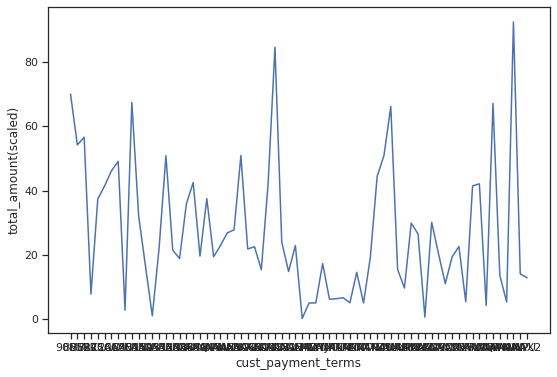

In [ ]:
# Visual Plot
df=pd.DataFrame(train_data.groupby('cust_payment_terms')['total_amount_by_1000'].mean()).reset_index()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
plt.xlabel('cust_payment_terms')
plt.ylabel('total_amount(scaled)')
ax.plot(df['cust_payment_terms'],df['total_amount_by_1000'])
fig.show()



Information given by this is not sufficient so moving on to bar-plot

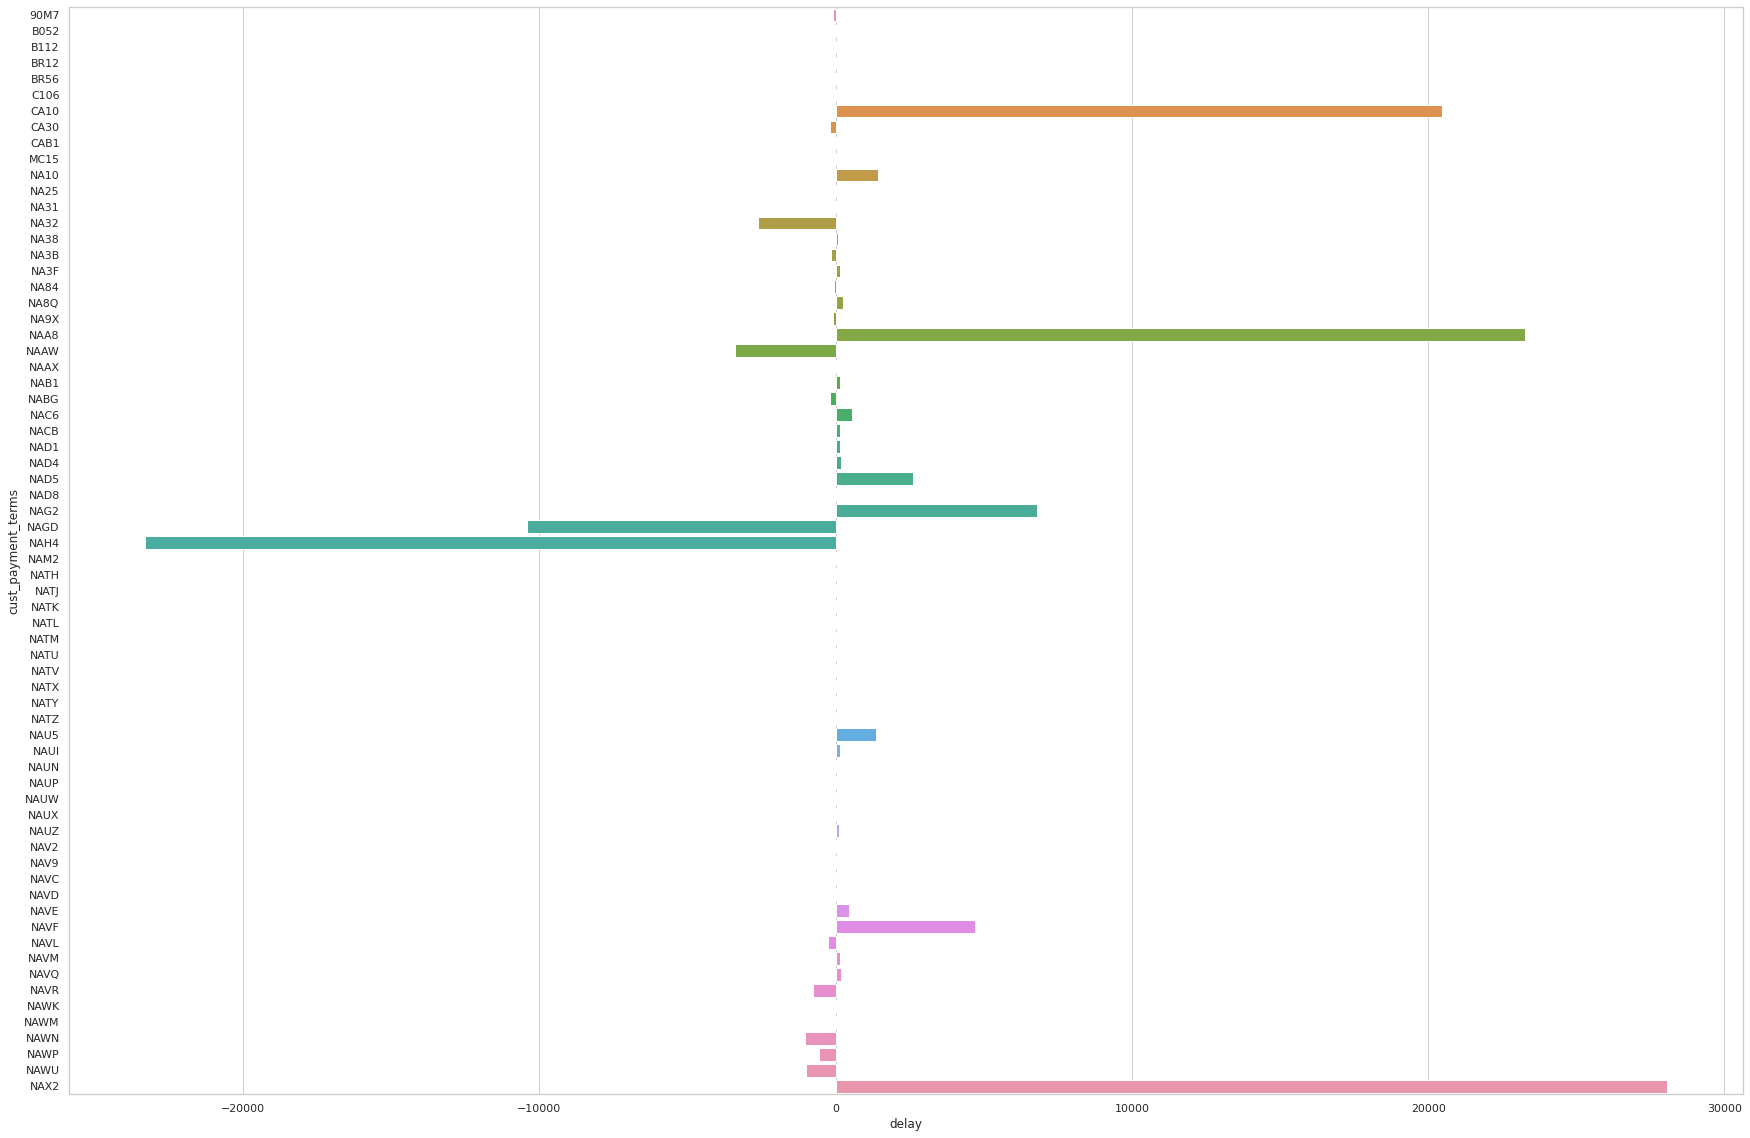

In [ ]:
# Plotting bar-plot using seaborn
sns.set(style="whitegrid")
fig=plt.figure(figsize=(30,20))
terms=train_data.groupby('cust_payment_terms')['delay'].sum()
sns.barplot(y=terms.index,x=terms)

The above plot shows customer_payment_terms is an essential factor for delay

Hence confirmed that customer payment terms is an Nominal Column

# 6.1 Encoding

Now doing One Hot encoding for Customer Payment Terms

Sadly One hot encoding did not work , It created 68 columns

Now moving On to Target Encoding

In [ ]:
# Creating a new column that is Invoice Currency code range(0,1)

X_train['inv_curr_code']=np.where(X_train.invoice_currency=='CAD',0,1)
X_train.loc[X_train.invoice_currency=='CAD',:]

# Now we can drop the column invoice_currency column
X_train.drop('invoice_currency',axis=1,inplace=True)
X_train.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1


Now encoding the column 'cust_payment_terms' using Target Encoding

In [ ]:
len(X_train.cust_payment_terms.unique())

# These are the number of unique Labels in the cust_payment_terms column
# These are to be encoded


66

In [ ]:
X_train.groupby('cust_payment_terms').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,inv_curr_code
cust_payment_terms,,,,,,,,,,,,,,,,,
90M7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
B052,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
B112,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BR12,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
BR56,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAWK,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
NAWN,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
NAWP,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48


NOTE:



*   As from our graph we nmotice that the customer payment terms gighly affect the delay.
*   Thus for this I created a new variable "avg_delay_as_per_terms"
*   It is defined as the median of all the customer who agreed  on the same terms






In [ ]:
# TARGET ENCODING

X_train['target'] = y_train # adding it again for demonstration of target encoding

target_mapper = X_train.groupby('cust_payment_terms')['target'].median().to_dict()
print(target_mapper)

X_train.drop('target',axis=1,inplace=True) # Removing it back

X_train['avg_delay_as_per_terms'] = X_train['cust_payment_terms'].map(target_mapper)
X_train.head()

{'90M7': -1.0, 'B052': -10.0, 'B112': 1.0, 'BR12': -0.5, 'BR56': 1.0, 'C106': -1.0, 'CA10': 4.0, 'CA30': -2.0, 'CAB1': 5.5, 'NA10': 2.0, 'NA25': -3.0, 'NA31': -6.0, 'NA32': 0.0, 'NA38': 2.0, 'NA3B': -3.0, 'NA3F': 8.5, 'NA84': -5.0, 'NA8Q': 9.0, 'NA9X': -8.0, 'NAA8': 0.0, 'NAAW': -19.0, 'NAAX': -1.0, 'NAB1': 3.5, 'NABG': 1.0, 'NAC6': 0.0, 'NACB': 4.0, 'NAD1': 0.0, 'NAD4': 2.0, 'NAD5': 4.0, 'NAD8': 1.0, 'NAG2': 7.0, 'NAGD': 0.0, 'NAH4': -3.0, 'NAM2': -11.0, 'NATH': 1.0, 'NATJ': 1.0, 'NATK': 2.0, 'NATL': 15.0, 'NATM': 1.0, 'NATU': 1.0, 'NATV': 1.0, 'NATX': 1.0, 'NATY': 1.0, 'NATZ': 3.0, 'NAU5': 1.0, 'NAUI': 20.0, 'NAUN': 5.0, 'NAUP': 1.0, 'NAUW': 1.0, 'NAUX': 20.0, 'NAUZ': 1.0, 'NAV2': -8.0, 'NAV9': 14.0, 'NAVC': 7.5, 'NAVD': 0.0, 'NAVE': 0.0, 'NAVF': 7.0, 'NAVL': -2.5, 'NAVM': 1.5, 'NAVQ': 4.0, 'NAVR': 0.0, 'NAWK': 1.0, 'NAWN': 0.0, 'NAWP': -8.0, 'NAWU': 0.0, 'NAX2': 43.0}


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code,avg_delay_as_per_terms
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1,0.0
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1,-3.0
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1,0.0
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1,0.0
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1,-3.0


Hence , now the target encoding of the column 'cust_payment_terms' has been done

The new column which is supposed to replace ot is named avg_delay_as_per_terms

Now encoding Customer_name column

Now Encoding Customer Name

In [ ]:
# Unique labels for customer name
len(X_train.name_customer.unique())

3519

In [ ]:
# Target Encoding for customer_name
temp=X_train.copy()
temp['delay']=y_train
col_map=temp.groupby('name_customer')['delay'].mean().to_dict()
col_map


{'10167 systems': 1.0,
 '236008 corp': 22.0,
 '9043- corp': -10.0,
 '99 CE ': 1.5,
 '99 CE associates': 6.5,
 '99 CE corporation': 1.0,
 '99 CE foundation': -23.0,
 '99 CE llc': 3.3333333333333335,
 '99 CE systems': 1.75,
 'A & W F ': 6.0,
 'A & W F associates': 2.8,
 'A & W F co': 4.0,
 'A & W F corp': 5.0,
 'A & W F corporation': 4.0,
 'A & W F foundation': 3.5,
 'A & W F in': -1.0,
 'A & W F systems': 0.6666666666666666,
 'A & W F us': 1.0,
 'ABC B foundation': 2.0,
 'ABC B llc': 2.0,
 'ABC B us': 5.0,
 'ACE  ': -1.0,
 'ACE  us': -1.0,
 'ADAMS in': -2.0,
 'ADAMS trust': -9.0,
 'ADEL foundation': 0.0,
 'AFFI ': -7.0,
 'AFFI co': -5.5,
 'AFFI foundation': -5.0,
 'AFFI llc': -10.0,
 'AFFI us': -7.0,
 'AFFILI ': -4.0,
 'AFFILI associates': -3.5,
 'AFFILI co': -4.4,
 'AFFILI corp': -3.3333333333333335,
 'AFFILI corporation': -24.25,
 'AFFILI foundation': -2.75,
 'AFFILI in': -3.0,
 'AFFILI llc': -12.2,
 'AFFILI systems': -25.0,
 'AFFILI trust': -5.0,
 'AFFILI us': -4.0,
 'AFGHAN in': -6.

Now merging this with the X_train

In [ ]:
'''
new=X_train.merge(col_map,how='left',left_on=['name_customer'],right_on=['name_customer'])
new.loc[45:50,:]
'''
X_train['cust_name(ENC)']=X_train['name_customer'].map(col_map)
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code,avg_delay_as_per_terms,cust_name(ENC)
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1,0.0,-1.666667
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1,-3.0,-1.967606
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1,0.0,0.000000
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1,0.0,0.869565
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1,-3.0,-2.168210


In [ ]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code,avg_delay_as_per_terms,cust_name(ENC)
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1,0.0,-1.666667
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1,-3.0,-1.967606
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1,0.0,0.000000
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1,0.0,0.869565
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1,-3.0,-2.168210


Thus by now customer_names have been encoded as "cust_name(ENC)"

Business_year column is already in float and requires no changes.

This  column is also essential as delay depends on business year as per graph

In [ ]:
X_train.groupby('buisness_year').size()

buisness_year
2019.0    26562
2020.0     3994
dtype: int64

In [ ]:
len(X_train.business_code.unique())

6

Encoding Customer Number

In [ ]:
# Unique customer numbers
len(X_train.cust_number.unique())

1231

In [ ]:
# Target Encoding for cust_number
temp=X_train.copy()
temp['delay']=y_train
MAPPER=temp.groupby('cust_number')['delay'].mean().to_dict()
MAPPER

{'0100000048': 0.6666666666666666,
 '0100000051': -25.0,
 '0100000158': 92.0,
 '0100000161': 2.0,
 '0100000217': -3.0,
 '0100000222': -3.7857142857142856,
 '0100000272': -6.0,
 '0100000533': -10.25,
 '0100000933': -8.0,
 '0100001196': 1.8714285714285714,
 '0100001222': 2.0,
 '0100001362': 2.0,
 '0100001452': -2.25,
 '0100003940': 0.5,
 '0100004317': 0.0,
 '0100004335': 1.5,
 '0100004536': -0.6153846153846154,
 '0100004744': 0.0,
 '0100005721': -8.333333333333334,
 '0100006176': 3.5,
 '0100006311': 0.0,
 '0100006671': 3.0,
 '0100006823': 3.5,
 '0100006887': -7.0,
 '0100007741': 13.0,
 '0100007796': 1.7777777777777777,
 '0100007916': -23.666666666666668,
 '0100008001': -6.333333333333333,
 '0100008347': 2.6666666666666665,
 '0100008870': 0.0,
 '0100009866': 0.0,
 '0100009932': 2.6666666666666665,
 '0100009983': 8.0,
 '0100010082': -30.0,
 '0100010265': 3.0,
 '0100011023': -2.0,
 '0100011556': -10.0,
 '0100011656': -6.0,
 '0100011799': -4.0,
 '0100011895': 0.5,
 '0100011958': 2.0625,
 '01

In [ ]:
# mapping cust_number(ENC)
X_train['cust_num(ENC)']=X_train['cust_number'].map(MAPPER)
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code,avg_delay_as_per_terms,cust_name(ENC),cust_num(ENC)
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1,0.0,-1.666667,1.125926
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1,-3.0,-1.967606,-2.330840
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1,0.0,0.000000,-0.058824
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1,0.0,0.869565,1.062500
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1,-3.0,-2.168210,-2.330840


Now ,
       The column cust_number has  beeen encoded as 'cust_num(ENC)'

# 7.1 Feature Engineering

Here I am creating a new feature called as "time_given"
*   This feature denotes the time given to a particular client to clear his payment dues
*   time_given=due_in_date - document_create_date.1





In [ ]:
# Creating new feature
X_train['time_given']=X_train['due_in_date']-X_train['document_create_date.1']
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,inv_curr_code,avg_delay_as_per_terms,cust_name(ENC),cust_num(ENC),time_given
0,U001,0200782001,GORDO in,2019-03-12,2019.0,1.928829e+09,2019-02-20,2019-02-20,2019-02-20,2019-03-07,RV,1.0,35308.72,2019-02-20,NAA8,1.928829e+09,0,1,0.0,-1.666667,1.125926,15 days
1,U001,0200769623,WAL-MAR corporation,2019-04-23,2019.0,1.929092e+09,2019-04-07,2019-04-05,2019-04-07,2019-04-22,RV,1.0,27641.22,2019-04-07,NAH4,1.929092e+09,0,1,-3.0,-1.967606,-2.330840,15 days
2,U001,0200780849,LAUREL llc,2019-02-13,2019.0,1.928707e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,RV,1.0,22092.83,2019-01-29,NAA8,1.928707e+09,0,1,0.0,0.000000,-0.058824,15 days
3,U001,0200743123,KROGER foundation,2019-02-08,2019.0,1.928670e+09,2019-01-24,2019-01-23,2019-01-24,2019-02-08,RV,1.0,79422.35,2019-01-24,NAA8,1.928670e+09,0,1,0.0,0.869565,1.062500,15 days
4,U001,0200769623,WAL-MAR foundation,2020-02-11,2020.0,1.930437e+09,2020-01-25,2020-01-24,2020-01-25,2020-02-09,RV,1.0,764.76,2020-01-25,NAH4,1.930437e+09,0,1,-3.0,-2.168210,-2.330840,15 days


The time difference is of type "TimeDelta"

Now converting it to int type

In [ ]:
# Conversion from TimeDelta to int
X_train['time_given']=(X_train['time_given']/ np.timedelta64(1, 'D')).astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30556 entries, 0 to 31911
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30556 non-null  object        
 1   cust_number             30556 non-null  object        
 2   name_customer           30556 non-null  object        
 3   clear_date              30556 non-null  datetime64[ns]
 4   buisness_year           30556 non-null  float64       
 5   doc_id                  30556 non-null  float64       
 6   posting_date            30556 non-null  datetime64[ns]
 7   document_create_date    30556 non-null  datetime64[ns]
 8   document_create_date.1  30556 non-null  datetime64[ns]
 9   due_in_date             30556 non-null  datetime64[ns]
 10  document type           30556 non-null  object        
 11  posting_id              30556 non-null  float64       
 12  total_open_amount       30556 non-null  float6

Let us take a look at the scatter plot and visualize how it affects delay

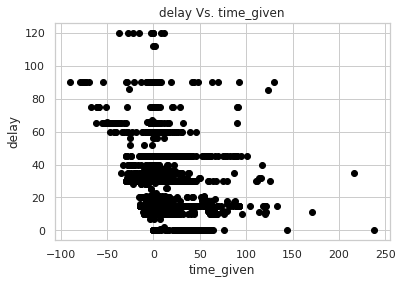

In [ ]:
# Sctter plot of 
plt.scatter(y_train,X_train['time_given'],color='black')
plt.xlabel("time_given")
plt.ylabel("delay")
plt.title("delay Vs. time_given")
plt.show()

INFERENCE:

*   It is observed from the graph that if more time is given to a client , delay is less and vice-versa




The doc_id column has many unique values as  seen from below

In [ ]:
# analysis of unique values in doc_id
len(X_train.doc_id.unique())

30556

As stated earlier now we engineeer a new column to replace "total_open_amount" by using log transform

In [ ]:
#Normalizing (log2 Transformation)
X_train['total_open_amount_1']=np.log2(X_train['total_open_amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


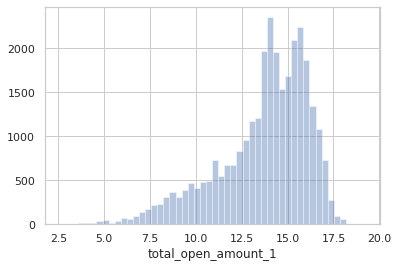

In [ ]:
import seaborn as sns
sns.distplot(a=X_train['total_open_amount_1'], kde=False)

This plot seems closer to  a normal distribution as compared to before

In [ ]:
# Target encoding Business Code
def BC_MAPPER(key):
  if key not in BC_DICT.keys():
    return 2 #default value
  else:
    return BC_DICT[key]

Now below we create two new columns namely,


*   business_code(ENC) --> encoded form of business_code
*   due_month -->month of due_in_date



In [ ]:
# Calling Encoder
X_train['business_code(ENC)']=X_train['business_code'].map(BC_MAPPER)
# Creating new feature due_month
X_train['due_month']=X_train['due_in_date'].dt.month

As business code is now in float we check its impact on delay

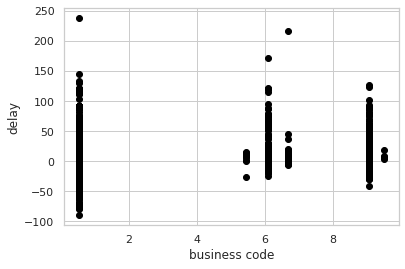

In [ ]:
# Impact of business code on delay
import matplotlib.pyplot as plt
plt.xlabel('business code')
plt.ylabel('delay')
plt.scatter(X_train['business_code(ENC)'],y_train,color='black')
plt.show()

NOTE

From graph it is sceen that business codes encoded as higher integers tend to show less delay

now business code has been target encoded

In [ ]:
# Creating feature due_day
X_train['due_day']=X_train['due_in_date'].dt.day
# Document create month
X_train['doc_month']=X_train['document_create_date.1'].dt.month
# Document create day
X_train['doc_day']=X_train['document_create_date.1'].dt.day

# 8.1 Feature Selection

Filter Methods

In [ ]:
# Using Filter methods 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

Using Variance threshold :

**For** using Variance Threshold all features should be numerical which is not currently the case as seen below

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30556 entries, 0 to 31911
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30556 non-null  object        
 1   cust_number             30556 non-null  object        
 2   name_customer           30556 non-null  object        
 3   clear_date              30556 non-null  datetime64[ns]
 4   buisness_year           30556 non-null  float64       
 5   doc_id                  30556 non-null  float64       
 6   posting_date            30556 non-null  datetime64[ns]
 7   document_create_date    30556 non-null  datetime64[ns]
 8   document_create_date.1  30556 non-null  datetime64[ns]
 9   due_in_date             30556 non-null  datetime64[ns]
 10  document type           30556 non-null  object        
 11  posting_id              30556 non-null  float64       
 12  total_open_amount       30556 non-null  float6

So I copy X_train into a new df and drop all non-numeric columns so it can be passed to VAriance Threshold 

In [ ]:
train=X_train.copy()
train.drop(['business_code', 'cust_number','name_customer','clear_date','posting_date','document_create_date', 'document_create_date.1', 'due_in_date' ,'document type','posting_id','baseline_create_date',	'cust_payment_terms','isOpen'],axis=1,inplace=True)
train.drop(['doc_id','invoice_id','total_open_amount'],axis=1,inplace=True)
train.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30556 entries, 0 to 31911
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buisness_year           30556 non-null  float64
 1   inv_curr_code           30556 non-null  int64  
 2   avg_delay_as_per_terms  30556 non-null  float64
 3   cust_name(ENC)          30556 non-null  float64
 4   cust_num(ENC)           30556 non-null  float64
 5   time_given              30556 non-null  int64  
 6   total_open_amount_1     30556 non-null  float64
 7   business_code(ENC)      30556 non-null  float64
 8   due_month               30556 non-null  int64  
 9   due_day                 30556 non-null  int64  
 10  doc_month               30556 non-null  int64  
 11  doc_day                 30556 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 3.0 MB


In [ ]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(train)
#the number of non-constant features.
len(train.columns[constant_filter.get_support()])

12

Thus we can say that all the 12 columns are not constant in nature.

This is also verified from below

In [ ]:
#Checking for constant columns
constant_columns = [column for column in train.columns
                    if column not in train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


Effect of invoice_currency code on delay

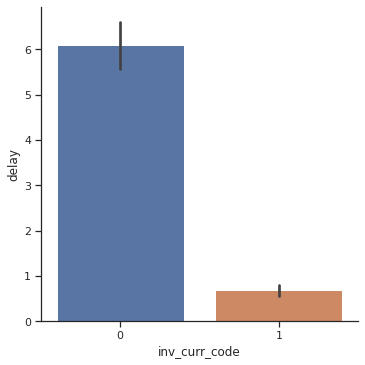

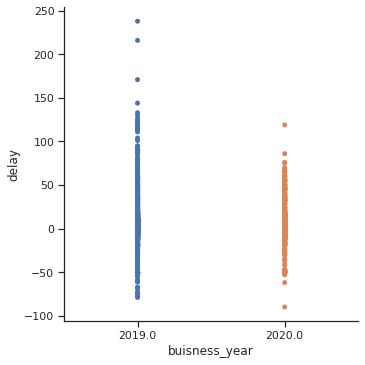

In [ ]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
train=X_train.copy()
train['delay']=y_train
sns.catplot(x="inv_curr_code", y="delay",kind="bar", data=train)  
sns.catplot(x="buisness_year",y="delay",jitter=False,data=train)

INFERENCE--> Clients who use CAD as invoice_currency tend to delay more than those who use USD


# 8.2 Corelation and Covariace

Covariance & Corelation using HeatMap

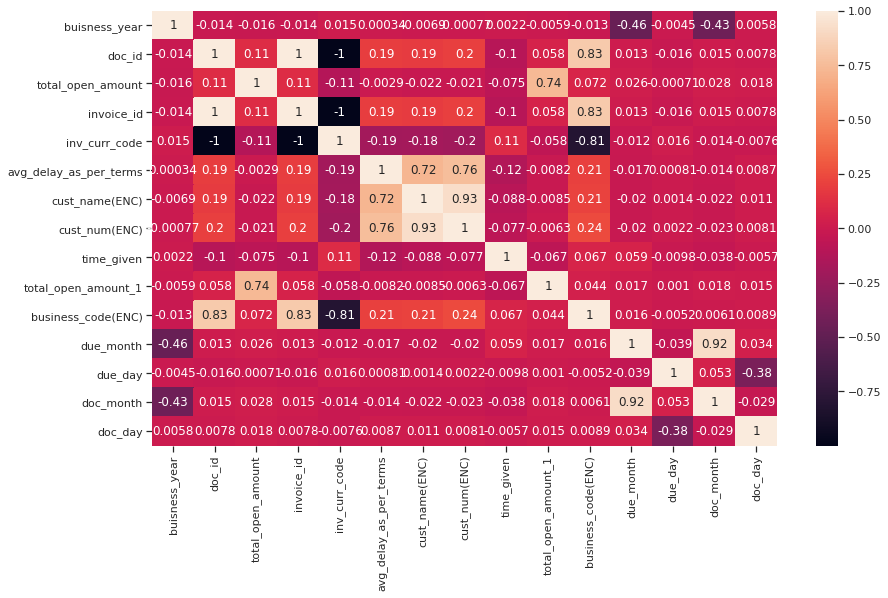

In [ ]:
#visualisation
train=X_train.copy()
train.drop(['business_code', 'cust_number','name_customer','clear_date','posting_date','document_create_date', 'document_create_date.1', 'due_in_date' ,'document type','posting_id','baseline_create_date',	'cust_payment_terms','isOpen'],axis=1,inplace=True)
corr=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

This shows the covariance between different columns of the X_train data.

*   The co-relation betweeen target and other columns should be high.
*   The co-relation among other columns should be asa low as possible.



# 9.1 Fitting into Model

Now finally fitting the model

In [ ]:
X_train.shape

(30556, 28)

In [ ]:
#Saving X_train to another variable (BACKUP)
just_in_case=X_train.copy()

In [ ]:
X_train.drop(['business_code', 'cust_number','name_customer','clear_date','posting_date','document_create_date', 'document_create_date.1', 'due_in_date' ,'document type','posting_id','baseline_create_date',	'cust_payment_terms','isOpen'],axis=1,inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30556 entries, 0 to 31911
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buisness_year           30556 non-null  float64
 1   doc_id                  30556 non-null  float64
 2   total_open_amount       30556 non-null  float64
 3   invoice_id              30556 non-null  float64
 4   inv_curr_code           30556 non-null  int64  
 5   avg_delay_as_per_terms  30556 non-null  float64
 6   cust_name(ENC)          30556 non-null  float64
 7   cust_num(ENC)           30556 non-null  float64
 8   time_given              30556 non-null  int64  
 9   total_open_amount_1     30556 non-null  float64
 10  business_code(ENC)      30556 non-null  float64
 11  due_month               30556 non-null  int64  
 12  due_day                 30556 non-null  int64  
 13  doc_month               30556 non-null  int64  
 14  doc_day                 30556 non-null

In [ ]:
X_train.drop(['doc_id','invoice_id','total_open_amount'],axis=1,inplace=True)

In [ ]:
X_train.shape

(30556, 12)

# 9.2 Mapper Function

Now , time has come to make our pre-processing function to make out test data ready,
for making predictions.

In [ ]:
# Defining Mapper Functions

def cpt_mapper(key):
  '''
  maps customer payment terms
  '''
  if key not in target_mapper.keys():
    return X_train['avg_delay_as_per_terms'].mean()
  else:
    return target_mapper[key]

def cn_mapper(key):
  '''
  maps customer name
  '''
  if key not in col_map.keys():
    return X_train['cust_name(ENC)'].mean()
  else:
    return col_map[key]

def cno_mapper(key):
  '''
  maps customer number
  '''
  if key not in MAPPER.keys():
    return X_train['cust_num(ENC)'].mean()
  else:
    return MAPPER[key]

def BC_MAPPER(key):
  '''
  maps business code
  '''
  if key not in BC_DICT.keys():
    return 2 #default value
  else:
    return BC_DICT[key]


# 9.3 Preprocessing Function

In [ ]:
def preprocess(X_Set,y_Set):
  '''
  This function takes a data-set and preprocess it 
  exactly the same as X-train data
  '''
  # Creating a new column that is Invoice Currency code {0,1}

  X_Set['inv_curr_code']=np.where(X_Set.invoice_currency=='CAD',0,1)
 
  # Now we can drop the column invoice_currency column
  X_Set.drop('invoice_currency',axis=1,inplace=True)
  
  # TARGET ENCODING
  
  # Customer payment terms


  X_Set['avg_delay_as_per_terms']= X_Set['cust_payment_terms'].map(cpt_mapper)

  # Customer Name

  X_Set['cust_name(ENC)']=X_Set['name_customer'].map(cn_mapper)
  
  # Customer Number
  X_Set['cust_num(ENC)']=X_Set['cust_number'].map(cno_mapper)

  # Creating New column " time_given "

  X_Set['time_given']=X_Set['due_in_date']-X_Set['document_create_date.1']
  X_Set['time_given']=(X_Set['time_given']/ np.timedelta64(1, 'D')).astype(int)

  # Log transforming total_open_amount
  X_Set['total_open_amount_1']=np.log2(X_Set['total_open_amount'])

  # Mapping business code as business_code(ENC)
  X_Set['business_code(ENC)']=X_Set['business_code'].map(BC_MAPPER)

  #Creting new feature due month
  X_Set['due_month']=X_Set['due_in_date'].dt.month

  # Creating feature due_day
  X_Set['due_day']=X_Set['due_in_date'].dt.day
  # Document create month
  X_Set['doc_month']=X_Set['document_create_date.1'].dt.month
  # Document create day
  X_Set['doc_day']=X_Set['document_create_date.1'].dt.day

  #Dropping Columns
  X_Set.drop(['business_code', 'cust_number','name_customer','clear_date','posting_date','document_create_date', 'document_create_date.1', 'due_in_date' ,'document type','posting_id','baseline_create_date',	'cust_payment_terms','isOpen'],axis=1,inplace=True)
  X_Set.drop(['doc_id','invoice_id','total_open_amount'],axis=1,inplace=True)
  
  return X_Set,y_Set

# 10.1 Validation

Spliting validation sets into x and y

In [ ]:
# Validation 1
X_Val1=val1.copy()
y_Val1=X_Val1['delay']
X_Val1.drop('delay',axis=1,inplace=True)

In [ ]:
#Validation 2
X_Val2=val2.copy()
y_Val2=X_Val2['delay']
X_Val2.drop('delay',axis=1,inplace=True)

# 10.2 Fitting the model

In [ ]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predicting on Validation sets

In [ ]:
# Predicting values for Validation Sets
x_val1,y_val1=preprocess(X_Val1,y_Val1)
x_val2,y_val2=preprocess(X_Val2,y_Val2)
val1_preds=clf.predict(x_val1)
val2_preds=clf.predict(x_val2)

In [ ]:
# Creating a Evluation Function
from sklearn.metrics import r2_score,mean_squared_error
def evaluate_model(labels,predictions):
  print("RMSE : ",mean_squared_error(labels,predictions,squared=False))
  print("MSE : ",mean_squared_error(labels,predictions))
  print("R^2 SCORE : ",r2_score(labels,predictions))


In [ ]:
#Evluating the RandomForest Refressor
evaluate_model(y_val1,val1_preds)
evaluate_model(y_val2,val2_preds)


RMSE :  7.170858697815403
MSE :  51.42121446403482
R^2 SCORE :  0.5263690699077093
RMSE :  7.735628655521708
MSE :  59.83995069612859
R^2 SCORE :  0.4003962187230836


In [ ]:

# Trying Lssso Reggressor
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.9)
reg.fit(X_train,y_train)
print("Results in Validation 1")
evaluate_model(y_val1,reg.predict(x_val1))
print("Results in Validation 2")
evaluate_model(y_val2,reg.predict(x_val2))


RMSE :  7.916231612432075
MSE :  62.66672294166893
R^2 SCORE :  0.4227888512151331
RMSE :  7.938909772701923
MSE :  63.02628837910209
R^2 SCORE :  0.36846871709732376


In [ ]:

#Trying RidgeRegression Model
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.1)
ridge.fit(X_train,y_train)
val1_preds=ridge.predict(x_val1)
val2_preds=ridge.predict(x_val2)
evaluate_model(y_val1,ridge.predict(x_val1))
evaluate_model(y_val2,ridge.predict(x_val2))


RMSE :  7.869813797537699
MSE :  61.933969207914735
R^2 SCORE :  0.42953810511868185
RMSE :  7.904155524322943
MSE :  62.47567455268489
R^2 SCORE :  0.37398593642157796


From my experiments I found that the random forest regressor gave the best base results for me



*   Below is the list of all other models I tried .
*   I found that the best result was given by RAndomForestRegressor()



In [ ]:
'''
#Trying SVC kernel='linear'
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
y2_preds=ridge.predict(x)
mean_squared_error(y2,y2_preds,squared=False)
'''

"\n#Trying SVC kernel='linear'\nfrom sklearn import svm\nregr = svm.SVR()\nregr.fit(X_train, y_train)\ny2_preds=ridge.predict(x)\nmean_squared_error(y2,y2_preds,squared=False)\n"

In [ ]:
'''
#Trying out GradientBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
est.predict(x)
y2_preds=ridge.predict(x)
mean_squared_error(y2,y2_preds,squared=False)
r2_score(y2,y_preds)
'''


"\n#Trying out GradientBoostRegressor\nfrom sklearn.ensemble import GradientBoostingRegressor\nest = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,\n    max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)\nest.predict(x)\ny2_preds=ridge.predict(x)\nmean_squared_error(y2,y2_preds,squared=False)\nr2_score(y2,y_preds)\n"

In [ ]:
'''
#Lasso Variant
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit(X_train,y_train)
mean_squared_error(y2,y2_preds,squared=False)
'''

'\n#Lasso Variant\nfrom sklearn import linear_model\nreg = linear_model.LassoLars(alpha=.1)\nreg.fit(X_train,y_train)\nmean_squared_error(y2,y2_preds,squared=False)\n'

# 10.3 HyperParameter Tuning

Fitting model with n_estimators=100

In [ ]:
# Fitting 
clf=RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Now making predictions on the same validation sets
val1_pred=clf.predict(x_val1)
val2_pred=clf.predict(x_val2)


In [ ]:
# Testing the accuracy
evaluate_model(y_val1,val1_preds)
evaluate_model(y_val2,val2_preds)

RMSE :  7.869813797537699
MSE :  61.933969207914735
R^2 SCORE :  0.42953810511868185
RMSE :  7.904155524322943
MSE :  62.47567455268489
R^2 SCORE :  0.37398593642157796


As we can see tuning is not giving better results so I have used the base model

# 10.4 Grid Search CV



*   Here i am using grid Search CV to search for optimal parameters
*   Grid Search first requires a parameter grid,which I am making below



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Now the parametrized grid is made.

Instantizing and Fitting the model

In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
#rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 35.7min


KeyboardInterrupt: ignored

In [ ]:
#Finding the best parameters
rf_random.best_params_

# 11.1 Making predictions on the test data

Now I am making predictions on the test data.

In [ ]:
df=test_data.copy()

It is to be noted that the test data is not yet processed and contains NULL values in the clear date column

We need to fill these values with our predicted dates and finally bin them according to the following buckets.

● 0-15 days

● 16-30 days

● 31-45 days

● 46-60 days

● Greater than 60 days




Now this is ready for preprocessing function

In [ ]:
# X_test and y_test creation
y_test=[]
X_test,y_test=preprocess(test_data,y_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 45594 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buisness_year           4188 non-null   float64
 1   inv_curr_code           4188 non-null   int64  
 2   avg_delay_as_per_terms  4188 non-null   float64
 3   cust_name(ENC)          4188 non-null   float64
 4   cust_num(ENC)           4188 non-null   float64
 5   time_given              4188 non-null   int64  
 6   total_open_amount_1     4188 non-null   float64
 7   business_code(ENC)      4188 non-null   float64
 8   due_month               4188 non-null   int64  
 9   due_day                 4188 non-null   int64  
 10  doc_month               4188 non-null   int64  
 11  doc_day                 4188 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 425.3 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

Making Predictions Using our RandomForest Regressor model

In [ ]:
y_test=clf.predict(X_test)
y_test

array([-1.84,  1.24,  0.17, ..., -0.05,  0.62, -3.34])

Rounding float to int

AS we are predicting the number of days of delay ,we require integers so here I round up the floating points to int

In [ ]:
y_test_rounded=np.round(y_test).astype(int)
y_test_rounded

array([-2,  1,  0, ...,  0,  1, -3])

In [ ]:
# Adding y_test to df
df['delay']=y_test_rounded
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45594,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930582e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,RV,1.0,13353.11,2020-03-01,NAH4,1.930582e+09,1,-2
45595,U001,0200782772,ASSOC G trust,NaT,2020.0,1.930870e+09,2020-05-06,2020-05-06,2020-05-06,2020-05-21,USD,RV,1.0,26157.86,2020-05-06,NAA8,1.930870e+09,1,1
45596,U001,0200794332,COST corporation,NaT,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,83937.31,2020-03-12,NAAX,1.930642e+09,1,0
45597,U001,0200714710,SYSCO co,NaT,2020.0,1.930628e+09,2020-03-12,2020-03-10,2020-03-12,2020-04-13,USD,RV,1.0,510.31,2020-03-12,NA32,1.930628e+09,1,1
45598,U001,0200744019,TARG llc,NaT,2020.0,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,16807.58,2020-04-07,NAA8,1.930753e+09,1,2


In [ ]:
# Converting due_in_date to Date-time
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
# COnverting delay to time delta
df['delay']=pd.to_timedelta(df['delay'], unit='D')
# Creating new column clear_date
df['clear_date']=df['due_in_date']+df['delay']
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45594,U001,0200769623,WAL-MAR systems,2020-03-14,2020.0,1.930582e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,RV,1.0,13353.11,2020-03-01,NAH4,1.930582e+09,1,-2 days
45595,U001,0200782772,ASSOC G trust,2020-05-22,2020.0,1.930870e+09,2020-05-06,2020-05-06,2020-05-06,2020-05-21,USD,RV,1.0,26157.86,2020-05-06,NAA8,1.930870e+09,1,1 days
45596,U001,0200794332,COST corporation,2020-03-27,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,83937.31,2020-03-12,NAAX,1.930642e+09,1,0 days
45597,U001,0200714710,SYSCO co,2020-04-14,2020.0,1.930628e+09,2020-03-12,2020-03-10,2020-03-12,2020-04-13,USD,RV,1.0,510.31,2020-03-12,NA32,1.930628e+09,1,1 days
45598,U001,0200744019,TARG llc,2020-04-24,2020.0,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,16807.58,2020-04-07,NAA8,1.930753e+09,1,2 days


Thus we can predict the clear date of an invoice

In [ ]:
# Function for bucketing
from datetime import datetime, timedelta
def bucketizer(delay):
  '''
  This function is used to map the delays to their 
  respective bucket
  '''
  delay=delay.total_seconds() / timedelta (days=1).total_seconds()
  if delay <=15 :
    return "0-15 days"
  elif delay >=16 and delay <=30:
    return "15-30 days"
  elif delay >=31 and delay <=45:
    return "31-45 days"
  elif delay>=46 and delay<=60:
    return "46-60 days"
  else:
    return "greater than 60 days"

In [ ]:
# Now Creating the Bucket column using this function
df['bucket']=df['delay'].map(bucketizer)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,bucket
45594,U001,0200769623,WAL-MAR systems,2020-03-14,2020.0,1.930582e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,RV,1.0,13353.11,2020-03-01,NAH4,1.930582e+09,1,-2 days,0-15 days
45595,U001,0200782772,ASSOC G trust,2020-05-22,2020.0,1.930870e+09,2020-05-06,2020-05-06,2020-05-06,2020-05-21,USD,RV,1.0,26157.86,2020-05-06,NAA8,1.930870e+09,1,1 days,0-15 days
45596,U001,0200794332,COST corporation,2020-03-27,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,83937.31,2020-03-12,NAAX,1.930642e+09,1,0 days,0-15 days
45597,U001,0200714710,SYSCO co,2020-04-14,2020.0,1.930628e+09,2020-03-12,2020-03-10,2020-03-12,2020-04-13,USD,RV,1.0,510.31,2020-03-12,NA32,1.930628e+09,1,1 days,0-15 days
45598,U001,0200744019,TARG llc,2020-04-24,2020.0,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,16807.58,2020-04-07,NAA8,1.930753e+09,1,2 days,0-15 days


In [ ]:
df.groupby('bucket').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
bucket,,,,,,,,,,,,,,,,,,,
0-15 days,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126
15-30 days,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
31-45 days,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
46-60 days,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
greater than 60 days,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


Hence we have  bucketized all the test data entries and achieved our goal.

It is furthet clear from below,

In [ ]:
df[['due_in_date','delay','clear_date','bucket']].head()

,due_in_date,delay,clear_date,bucket
45594,2020-03-16,-2 days,2020-03-14,0-15 days
45595,2020-05-21,1 days,2020-05-22,0-15 days
45596,2020-03-27,0 days,2020-03-27,0-15 days
45597,2020-04-13,1 days,2020-04-14,0-15 days
45598,2020-04-22,2 days,2020-04-24,0-15 days


That's all !!! Thank You for ur time :)